In [1]:
%matplotlib inline

from collections import defaultdict
import gzip

import numpy as np
import matplotlib.pylab as plt

In [2]:
num_parents = 8
dp_2L = np.load(gzip.open('DP_2L.npy.gz', 'rb'))
dp_2L.shape

(194161, 9)

In [3]:
for i in range(num_parents):
    print(np.median(dp_2L[:,i]), np.median(dp_2L[50000:150000,i]))

17.0 14.0
23.0 22.0
31.0 29.0
28.0 24.0
32.0 27.0
31.0 31.0
25.0 24.0
24.0 20.0


In [4]:
window_size = 200000
parent_DP_windows = [defaultdict(list) for i in range(num_parents)]

In [5]:
def insert_in_window(row):
    for parent in range(num_parents):
        parent_DP_windows[parent][row[-1] // window_size].append(row[parent])

insert_in_window_v = np.vectorize(insert_in_window, signature='(n)->()')
_ = insert_in_window_v(dp_2L)

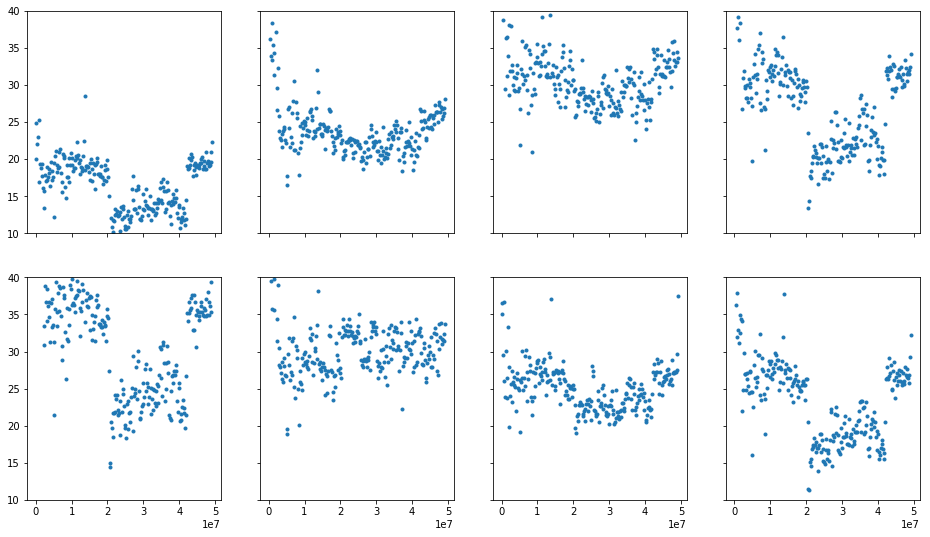

In [6]:
fig, axs = plt.subplots(2, num_parents // 2, figsize=(16, 9), sharex=True, sharey=True, squeeze=True)
for parent in range(num_parents):
    ax = axs[parent // 4][parent % 4]
    parent_data = parent_DP_windows[parent]
    ax.set_ylim(10, 40)
    ax.plot(*zip(*[(win*window_size, np.mean(lst)) for win, lst in parent_data.items()]), '.')